# Face recognition
Task is to recognize a face


### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow
tensorflow.__version__

'2.2.0-rc3'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [4]:
import os
% cd drive/My Drive/Colab Notebooks/face recognition

/content/drive/My Drive/Colab Notebooks/face recognition


### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
!unzip images.zip

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [0]:
aaron_path = '/content/drive/My Drive/Colab Notebooks/face recognition/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg'
image1 = load_image(aaron_path)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
WEIGHTS_FILE = "vgg_face_weights.h5"
model = vgg_face()
model.load_weights(WEIGHTS_FILE)

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [12]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
import numpy as np
embeddings=[]
labels=[]
file_names=[]
for i in metadata:
  try:
    img_path = i.image_path()
    file_name = img_path.split('/')
    name = file_name[-2]
    name = name.split('_')
    finalname = name[-1]
    labels.append(finalname)
    file_names.append(img_path)
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings.append(embedding_vector)
    itemindex = metadata.tolist().index(i)
    if itemindex%1000 == 0:
      print('Loaded '+str(itemindex+1)+' images')  
  except Exception:
    print("problem with "+img_path)
    listofzeros = [0] * 2622
    embeddings.append(listofzeros)


In [36]:
print(embeddings[-1])
print(labels[-1])
print(file_names[-1])

[ 0.00804217  0.00549364  0.00313436 ... -0.00899266  0.00914336
  0.03096325]
zendaya
PINS/pins_zendaya/zendaya77.jpg


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

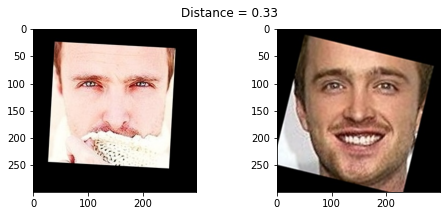

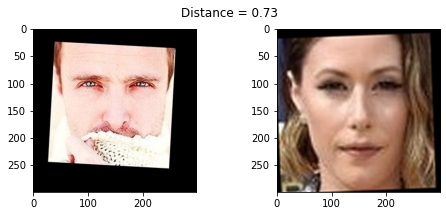

In [38]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)
y_train = encoded_labels[train_idx]
y_test = encoded_labels[test_idx]


### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(embeddings)

In [0]:
x_train = x_scaled[train_idx]
x_test = x_scaled[test_idx]

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test)

(9573, 2622)
(1197, 2622)
[ 0  0  0 ... 99 99 99]
[ 0  0  0 ... 99 99 99]


### Reduce dimensions using PCA (5 marks)
- Reduce feature dimensions using Principal Component Analysis

In [52]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_train)
pca.fit_transform(x_test)

array([[-2.04975638e+01,  8.85942406e+00, -1.31191696e+00, ...,
        -3.40195130e-02,  2.33735538e-02,  2.79491208e-15],
       [-1.47534860e+01,  1.50857683e+01,  7.16187889e+00, ...,
         6.21357024e-02, -3.29909747e-02,  2.79491208e-15],
       [-9.76308023e+00,  4.25824957e-02,  1.40978787e-01, ...,
         6.92550240e-02,  2.17097911e-02,  2.79491208e-15],
       ...,
       [ 2.37446688e+01, -2.02587911e+01, -2.29917649e+01, ...,
        -6.58818066e-02, -2.75123838e-02,  2.79491208e-15],
       [ 1.70887722e+01, -2.26165194e+01, -9.86635734e+00, ...,
        -6.32031471e-02, -3.01343678e-02,  2.79491208e-15],
       [ 2.33450987e+01, -2.18174039e+01, -1.33718217e+01, ...,
         3.66035585e-02, -1.16975593e-02,  2.79491208e-15]])

### Build a Classifier (5 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [53]:
from sklearn.svm import SVC

svc = SVC()
svc_model= svc.fit(x_train, y_train)

print("Accuracy on training set: {}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {}".format(svc.score(x_test, y_test)))

Accuracy on training set: 0.9977018698422647
Accuracy on test set: 0.9674185463659147


### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

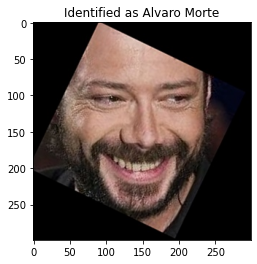

In [74]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc_model.predict(np.expand_dims(x_test[example_idx], axis=0))
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');